In [1]:
from selenium import webdriver
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service

from webdriver_manager.chrome import ChromeDriverManager

# Q1. Program to search for product defined by user input

In [2]:
#take a user input value to search for product
product = str(input('Enter your product from amazon websearch: '))

Enter your product from amazon websearch: guitar


In [3]:
#Solving Deprecation Warning
serve = Service(r'C://Users//Nitin Patel//chromedriver_win32//chromedriver.exe')

#open Chrome in incognito mode
mode = webdriver.ChromeOptions()
mode.add_argument('--incognito')

#insert site name
web = 'https://www.amazon.in/'

#open the webbrowser 
driver = webdriver.Chrome(service=serve, options = mode)
driver.get(web)
driver.maximize_window()

driver.implicitly_wait(3)

#search for product
search = driver.find_element(By.ID, 'twotabsearchtextbox')
search.send_keys(product)
time.sleep(1)

#click on search button
submit = driver.find_element(By.ID, 'nav-search-submit-button')
submit.click()

# Q2. Scrape Product details from first 3 pages

In [4]:
from selenium.common.exceptions import NoSuchElementException

product_name = []
product_price = []
product_return = []
product_delivery = []
product_availability = []
product_link = []
URL = []

In [5]:
urls=driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
for i in urls:
    URL.append(i.get_attribute('href'))

In [6]:
len(URL)

64

In [7]:
for url in URL[:5]:
    driver.get(url)
    time.sleep(1)
    
    try:
        product_name.append(driver.find_element(By.XPATH,'//span[@id="productTitle"]').text)
    except:
        pass
print('successful scrap')    

successful scrap


In [8]:
product_name

['Kadence Frontier Jumbo Semi Acoustic Guitar With Die Cast Keys Super Combo (Bag, 1 pack Strings, Strap, Picks, Capo, Tuner (natural)',
 'Belear MJT 38 Inch Black, Acoustic Guitar, With Dual Action Truss Rod',
 'GUITAR BRO - COMBO (Black Acoustic Guitar for Beginner, Guitar Learning Kit, Song Book, Video Lectures, Accessories like Pick, Bag)',
 'Vault Traveller 34 Inch Acoustic Guitar With Bag, Strap, Strings, Polishing Cloth, String Winder and Picks - Natural Gloss',
 'Intern INT-38C Acoustic Guitar Kit, With Bag, Strings, Pick And Strap, Black']

In [9]:
for url in URL[:5]:
    driver.get(url)
    try:
        product_price.append(driver.find_element(By.XPATH, '//div[@class="a-box-group"]//div[@class="a-section"]/span[1]//span[@class="a-price-whole"]').text)
    except:
        pass
print('successful')

successful


In [10]:
product_price

['3,049', '6,499', '2,150']

In [18]:
product_price.append('-')
product_price

['3,049', '6,499', '2,150', '-', '-']

In [11]:
for url in URL[:5]:
    driver.get(url)
    try:
        product_delivery.append(driver.find_element(By.XPATH, '//*[@id="mir-layout-DELIVERY_BLOCK-slot-DELIVERY_MESSAGE"]/b').text)
    except:
        pass
print('successful')

successful


In [12]:
product_delivery

['Wednesday, April 6',
 'Tuesday, April 5',
 'April 8 - 11',
 'Tuesday, April 5',
 'Tuesday, April 5']

In [13]:
for url in URL[:5]:
    driver.get(url)
    try:
        prduct_availability.append(driver.find_element(By.ID, 'availability').text)
    except:
        product_availability.append('-')

In [14]:
product_availability

['-', '-', '-', '-', '-']

In [20]:
import pandas as pd

In [21]:
Guitar = pd.DataFrame({'Name': product_name,'Price':product_price, 'Expected Delivery': product_delivery,'Availability': product_availability})
Guitar

,Name,Price,Expected Delivery,Availability
0,Kadence Frontier Jumbo Semi Acoustic Guitar Wi...,"3,049","Wednesday, April 6",-
1,"Belear MJT 38 Inch Black, Acoustic Guitar, Wit...","6,499","Tuesday, April 5",-
2,GUITAR BRO - COMBO (Black Acoustic Guitar for ...,"2,150",April 8 - 11,-
3,Vault Traveller 34 Inch Acoustic Guitar With B...,-,"Tuesday, April 5",-
4,"Intern INT-38C Acoustic Guitar Kit, With Bag, ...",-,"Tuesday, April 5",-


In [22]:
Guitar.to_csv('Guitar.csv')

# Q3. Write a python program to access the search bar and search button on images.google.com and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [23]:
from selenium import webdriver
import os
import urllib
import time

In [24]:
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

write the keyword: cars


<ipython-input-31-e05a3112acd6>:28: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  elem1 = driver.find_element_by_id('islmp')














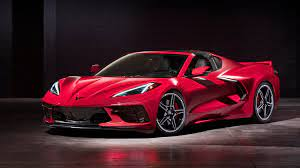
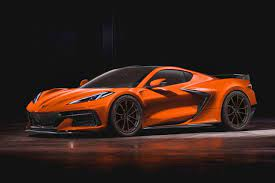
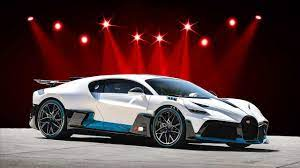
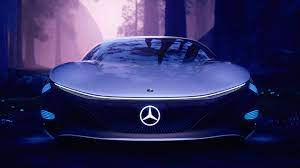
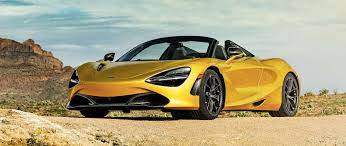
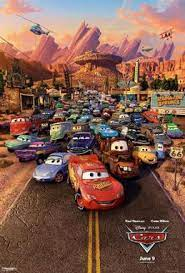
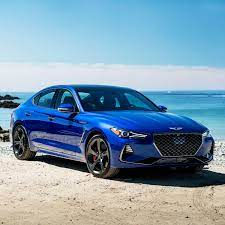
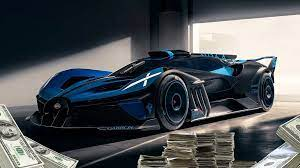
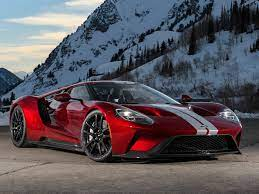
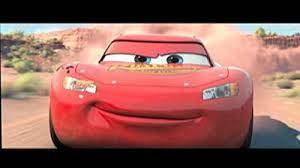
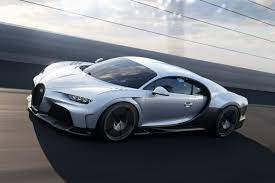

In [31]:
url_prefix = "https://www.google.com.sg/search?q="
url_postfix = "&source=lnms&tbm=isch&sa=X&ei=0eZEVbj3IJG5uATalICQAQ&ved=0CAcQ_AUoAQ&biw=939&bih=591"

saved_folder = 'Google Images'
def main():
    if not os.path.exists(saved_folder):
        os.mkdir(saved_folder)
    download_images()
    
def download_images():
        search = input('write the keyword: ')
        n_images = 10
        
        url = url_prefix+search+url_postfix
        
        path =  Service(r'C://Users//Nitin Patel//chromedriver_win32//chromedriver.exe')
        driver = webdriver.Chrome(service = path)
        driver.get(url)
        time.sleep(1)
        driver.maximize_window()
        
        value = 0
        for i in range(3):
            driver.execute_script("scrollBy("+ str(value) +",+1000);")
            value += 1000
            time.sleep(1)
            
        elem1 = driver.find_element_by_id('islmp')
        sub = elem1.find_elements_by_tag_name('img')
        
        j=0
        for j,i in enumerate(sub):
            if j<=n_images:
                src = i.get_attribute('src')
                try:
                    if src!= None:
                        src = str(src)
                        print(src)
                        
                        urllib.request.urlretrieve(src, os.path.join(saved_folder, search+str(j)+'.jpg'))
                        
                    else:
                        raise TypeError
                        
                except Exception as ec:
                    print('Error Raised:',ec)
                    
                    
if __name__ == "__main__":
    main()
                    

# Q4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time

In [2]:
path = Service(r'C://Users//Nitin Patel//chromedriver_win32//chromedriver.exe')
url = 'https://www.flipkart.com/search?sid=tyy%2C4io&otracker=CLP_Filters&p%5B%5D=facets.brand%255B%255D%3DGoogle'
driver = webdriver.Chrome(service = path)
driver.get(url)
driver.maximize_window()

In [3]:
name = []
price = []
ram_storage = []
battery = []
size = []
back_cam = []
front_cam = []
product_url = []

In [4]:
name_tag = driver.find_elements(By.XPATH, '//div[@class="col col-7-12"]/div[1]')
for i in name_tag:
    name.append(i.text)
len(name)

24

In [5]:
price_tag = driver.find_elements(By.XPATH, '//div[@class="_25b18c"]')
for i in price_tag:
    price.append(i.text)
price

['₹31,999',
 '₹39,999',
 '₹92,000',
 '₹39,999',
 '₹67,000',
 '₹61,000',
 '₹57,000',
 '₹67,000',
 '₹76,000',
 '₹66,000',
 '₹45,499',
 '₹70,000',
 '₹44,999',
 '₹44,999',
 '₹92,000',
 '₹83,000',
 '₹83,000',
 '₹92,000',
 '₹80,000',
 '₹71,000',
 '₹71,000',
 '₹80,000',
 '₹80,000',
 '₹68,400']

In [6]:
len(price)

24

In [8]:
storage_tag = driver.find_elements(By.XPATH, '//ul[@class="_1xgFaf"]//li[1]')
for i in storage_tag:
    ram_storage.append(i.text)
ram_storage

['6 GB RAM | 128 GB ROM',
 '4 GB RAM | 64 GB ROM',
 '4 GB RAM | 128 GB ROM',
 '4 GB RAM | 64 GB ROM',
 '4 GB RAM | 32 GB ROM',
 '4 GB RAM | 64 GB ROM',
 '4 GB RAM | 32 GB ROM',
 '4 GB RAM | 32 GB ROM',
 '4 GB RAM | 128 GB ROM',
 '4 GB RAM | 128 GB ROM',
 '4 GB RAM | 64 GB ROM',
 '4 GB RAM | 128 GB ROM',
 '4 GB RAM | 64 GB ROM',
 '4 GB RAM | 64 GB ROM',
 '4 GB RAM | 128 GB ROM',
 '4 GB RAM | 64 GB ROM',
 '4 GB RAM | 64 GB ROM',
 '4 GB RAM | 128 GB ROM',
 '4 GB RAM | 128 GB ROM',
 '4 GB RAM | 64 GB ROM',
 '4 GB RAM | 64 GB ROM',
 '4 GB RAM | 128 GB ROM',
 '4 GB RAM | 128 GB ROM',
 '4 GB RAM | 128 GB ROM']

In [9]:
len(ram_storage)

24

In [11]:
display_size = driver.find_elements(By.XPATH, '//ul[@class="_1xgFaf"]//li[2]')
for i in display_size:
    size.append(i.text)
size

['14.76 cm (5.81 inch) Full HD+ Display',
 '14.22 cm (5.6 inch) Full HD+ Display',
 '16.0 cm (6.3 inch) Quad HD+ Display',
 '14.22 cm (5.6 inch) Full HD+ Display',
 '13.97 cm (5.5 inch) Quad HD Display',
 '12.7 cm (5 inch) Full HD Display',
 '12.7 cm (5 inch) Full HD Display',
 '13.97 cm (5.5 inch) Quad HD Display',
 '13.97 cm (5.5 inch) Quad HD Display',
 '12.7 cm (5 inch) Full HD Display',
 '15.24 cm (6 inch) Quad HD+ Display',
 '12.7 cm (5 inch) Full HD Display',
 '15.24 cm (6 inch) Full HD+ Display',
 '15.24 cm (6 inch) Full HD+ Display',
 '16.0 cm (6.3 inch) Quad HD+ Display',
 '16.0 cm (6.3 inch) Quad HD+ Display',
 '16.0 cm (6.3 inch) Quad HD+ Display',
 '16.0 cm (6.3 inch) Quad HD+ Display',
 '13.97 cm (5.5 inch) Full HD+ Display',
 '13.97 cm (5.5 inch) Full HD+ Display',
 '13.97 cm (5.5 inch) Full HD+ Display',
 '13.97 cm (5.5 inch) Full HD+ Display',
 '13.97 cm (5.5 inch) Full HD+ Display',
 '13.97 cm (5.5 inch) Quad HD Display']

In [14]:
len(size)

24

In [15]:
cam_tag = driver.find_elements(By.XPATH, '//ul[@class="_1xgFaf"]//li[3]')
for i in cam_tag:
    front_cam.append(i.text)
front_cam

['12.2MP Rear Camera | 8MP Front Camera',
 '12.2MP Rear Camera | 8MP Front Camera',
 '12.2MP Rear Camera | 8MP + 8MP Dual Front Camera',
 '12.2MP Rear Camera | 8MP Front Camera',
 '12.3MP Rear Camera | 8MP Front Camera',
 '12.2MP Rear Camera | 8MP Front Camera',
 '12.3MP Rear Camera | 8MP Front Camera',
 '12.3MP Rear Camera | 8MP Front Camera',
 '12.3MP Rear Camera | 8MP Front Camera',
 '12.3MP Rear Camera | 8MP Front Camera',
 '12.2MP Rear Camera | 8MP Front Camera',
 '12.2MP Rear Camera | 8MP Front Camera',
 '12.2MP Rear Camera | 8MP Front Camera',
 '12.2MP Rear Camera | 8MP Front Camera',
 '12.2MP Rear Camera | 8MP + 8MP Dual Front Camera',
 '12.2MP Rear Camera | 8MP + 8MP Dual Front Camera',
 '12.2MP Rear Camera | 8MP + 8MP Dual Front Camera',
 '12.2MP Rear Camera | 8MP + 8MP Dual Front Camera',
 '12.2MP Rear Camera | 8MP + 8MP Dual Front Camera',
 '12.2MP Rear Camera | 8MP + 8MP Dual Front Camera',
 '12.2MP Rear Camera | 8MP + 8MP Dual Front Camera',
 '12.2MP Rear Camera | 8MP + 8

In [75]:
len(battery)

24

In [16]:
power_tag = driver.find_elements(By.XPATH, '//ul[@class="_1xgFaf"]//li[4]')
for i in power_tag:
    battery.append(i.text)
battery

['3140 mAh Battery',
 '3000 mAh Battery',
 '3430 mAh Battery',
 '3000 mAh Battery',
 '3450 mAh Battery',
 '2700 mAh Battery',
 '2770 mAh Battery',
 '3450 mAh Battery',
 '3450 mAh Battery',
 '2770 mAh Battery',
 '3520 mAh Battery',
 '2700 mAh Battery',
 '3700 mAh Battery',
 '3700 mAh Battery',
 '3430 mAh Battery',
 '3430 mAh Battery',
 '3430 mAh Battery',
 '3430 mAh Battery',
 '2915 mAh Battery',
 '2915 mAh Battery',
 '2915 mAh Battery',
 '2915 mAh Battery',
 '2915 mAh Battery',
 '3450 mAh Battery']

In [74]:
len(battery)

24

In [17]:
product_link = driver.find_elements(By.XPATH, '//a[@class="_1fQZEK"]')
for i in product_link:
    try:
        product_url.append(i.get_attribute('href'))
    except:
        product_url.append('-')
    
product_url

['https://www.flipkart.com/google-pixel-4a-just-black-128-gb/p/itm023b9677aa45d?pid=MOBFUSBNAZGY7HQU&lid=LSTMOBFUSBNAZGY7HQUWHTF0C&marketplace=FLIPKART&store=tyy%2F4io&srno=b_1_1&otracker=CLP_Filters&iid=b72060eb-9dd3-484c-a0d6-b174f7266f7b.MOBFUSBNAZGY7HQU.SEARCH&ssid=i0q0a960s00000001648989108148',
 'https://www.flipkart.com/google-pixel-3a-clearly-white-64-gb/p/itmfgk4jfgstaack?pid=MOBFFGFPJSCEXMSG&lid=LSTMOBFFGFPJSCEXMSGODGRZE&marketplace=FLIPKART&store=tyy%2F4io&srno=b_1_2&otracker=CLP_Filters&iid=b72060eb-9dd3-484c-a0d6-b174f7266f7b.MOBFFGFPJSCEXMSG.SEARCH&ssid=i0q0a960s00000001648989108148',
 'https://www.flipkart.com/google-pixel-3-xl-not-pink-128-gb/p/itmf9gapwxrznjrq?pid=MOBF9GAPWY47Q497&lid=LSTMOBF9GAPWY47Q497VYO0GO&marketplace=FLIPKART&store=tyy%2F4io&srno=b_1_3&otracker=CLP_Filters&iid=b72060eb-9dd3-484c-a0d6-b174f7266f7b.MOBF9GAPWY47Q497.SEARCH&ssid=i0q0a960s00000001648989108148',
 'https://www.flipkart.com/google-pixel-3a-just-black-64-gb/p/itmfgk4jfgstaack?pid=MOBFFGFP7

In [73]:
len(product_url)

24

In [18]:
import pandas as pd
Mobiles = pd.DataFrame({'Name': name, 'Price': price, 'RAM | STORAGE': ram_storage,
                        'Screen Display Size': size, 'Camera': front_cam,
                        'Battery Config.': battery, 'Product_Link': product_url})
Mobiles

,Name,Price,RAM | STORAGE,Screen Display Size,Camera,Battery Config.,Product_Link
0,"Google Pixel 4a (Just Black, 128 GB)","₹31,999",6 GB RAM | 128 GB ROM,14.76 cm (5.81 inch) Full HD+ Display,12.2MP Rear Camera | 8MP Front Camera,3140 mAh Battery,https://www.flipkart.com/google-pixel-4a-just-...
1,"Google Pixel 3a (Clearly White, 64 GB)","₹39,999",4 GB RAM | 64 GB ROM,14.22 cm (5.6 inch) Full HD+ Display,12.2MP Rear Camera | 8MP Front Camera,3000 mAh Battery,https://www.flipkart.com/google-pixel-3a-clear...
2,"Google Pixel 3 XL (Not Pink, 128 GB)","₹92,000",4 GB RAM | 128 GB ROM,16.0 cm (6.3 inch) Quad HD+ Display,12.2MP Rear Camera | 8MP + 8MP Dual Front Camera,3430 mAh Battery,https://www.flipkart.com/google-pixel-3-xl-not...
3,"Google Pixel 3a (Just Black, 64 GB)","₹39,999",4 GB RAM | 64 GB ROM,14.22 cm (5.6 inch) Full HD+ Display,12.2MP Rear Camera | 8MP Front Camera,3000 mAh Battery,https://www.flipkart.com/google-pixel-3a-just-...
4,"Google Pixel XL (Quite Black, 32 GB)","₹67,000",4 GB RAM | 32 GB ROM,13.97 cm (5.5 inch) Quad HD Display,12.3MP Rear Camera | 8MP Front Camera,3450 mAh Battery,https://www.flipkart.com/google-pixel-xl-quite...
5,"Google Pixel 2 (Kinda Blue, 64 GB)","₹61,000",4 GB RAM | 64 GB ROM,12.7 cm (5 inch) Full HD Display,12.2MP Rear Camera | 8MP Front Camera,2700 mAh Battery,https://www.flipkart.com/google-pixel-2-kinda-...
6,"Google Pixel (Very Silver, 32 GB)","₹57,000",4 GB RAM | 32 GB ROM,12.7 cm (5 inch) Full HD Display,12.3MP Rear Camera | 8MP Front Camera,2770 mAh Battery,https://www.flipkart.com/google-pixel-very-sil...
7,"Google Pixel XL (Very Silver, 32 GB)","₹67,000",4 GB RAM | 32 GB ROM,13.97 cm (5.5 inch) Quad HD Display,12.3MP Rear Camera | 8MP Front Camera,3450 mAh Battery,https://www.flipkart.com/google-pixel-xl-very-...
8,"Google Pixel XL (Very Silver, 128 GB)","₹76,000",4 GB RAM | 128 GB ROM,13.97 cm (5.5 inch) Quad HD Display,12.3MP Rear Camera | 8MP Front Camera,3450 mAh Battery,https://www.flipkart.com/google-pixel-xl-very-...
9,"Google Pixel (Quite Black, 128 GB)","₹66,000",4 GB RAM | 128 GB ROM,12.7 cm (5 inch) Full HD Display,12.3MP Rear Camera | 8MP Front Camera,2770 mAh Battery,https://www.flipkart.com/google-pixel-quite-bl...


In [ ]:
Mobiles.to_csv('Mobiles.csv')

# Q6. Write a program to scrap details of all the funding deals for second quarter (i.e Jan 21 – March 21) from trak.in.

In [19]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from time import sleep

In [20]:
path = Service(r'C://Users//Nitin Patel//chromedriver_win32//chromedriver.exe')
driver = webdriver.Chrome(service = path)
driver.get('https://trak.in/india-startup-funding-investment-2015/')
driver.maximize_window()

In [21]:
march_rows = len(driver.find_elements(By.XPATH, '//*[@id="tablepress-56"]/tbody/tr')) #no. of rows for march_2021
march_cols = len(driver.find_elements(By.XPATH, '//*[@id="tablepress-56_wrapper"]/div[3]/div[1]/div/table/thead/tr/th')) #no. of cols for march_2021

In [22]:
print(march_rows, march_cols)

7 9


In [27]:
name = driver.find_elements(By.XPATH, '//*[@id="tablepress-56"]/tbody//td[3]/a')
date = driver.find_elements(By.XPATH, '//*[@id="tablepress-56"]/tbody//tr//td[2]')
Industry_Sector = driver.find_elements(By.XPATH, '//*[@id="tablepress-56"]/tbody//tr//td[4]')
Sub_Industry = driver.find_elements(By.XPATH, '//*[@id="tablepress-56"]/tbody//tr//td[5]')
City = driver.find_elements(By.XPATH, '//*[@id="tablepress-56"]/tbody//tr//td[6]')
Investors = Sub_Industry = driver.find_elements(By.XPATH, '//*[@id="tablepress-56"]/tbody//tr//td[7]')
Investment_Type = Sub_Industry = driver.find_elements(By.XPATH, '//*[@id="tablepress-56"]/tbody//tr//td[8]')
Amount_Invested = Sub_Industry = driver.find_elements(By.XPATH, '//*[@id="tablepress-56"]/tbody//tr//td[9]')

In [28]:
march_2021 = []
for i in range(len(name)):
    march_info = {'Startup': name[i].text, 'Date': date[i].text,
                  'Industry': Industry_Sector[i].text,
                  'City/Location': City[i].text,
                  'Investor Name': Investors[i].text,  
                  'Investment Type': Investment_Type[i].text,
                  'Amount In USD': Amount_Invested[i].text}
    
    march_2021.append(march_info)

In [29]:
import pandas as pd
March_Funding = pd.DataFrame(march_2021)
March_Funding

,Startup,Date,Industry,City/Location,Investor Name,Investment Type,Amount In USD
0,DealShare,04/03/2021,E-commerce,"Jaipur, Rajasthan",Innoven Capital,Debt Financing,"250,000,000"
1,Uniphore,31/03/2021,Technology,Palo Alto,Sorenson Capital Partners,Series D,"140,000,000"
2,Dunzo,30/03/2021,E-commerce,Bengaluru,Krishtal Advisors Pte Ltd,Series E,"8,000,000"
3,BYJU’S,30/03/2021,Edu-tech,Bengaluru,"MC Global Edtech, B Capital, Baron, others",Series F,"460,000,000"
4,SkilloVilla,23/03/2021,Edu-tech,Bengaluru,"Titan Capital, others",Seed,"300,000,000"
5,CityMall,25/03/2021,E-commerce,Gurgaon,Accel Partners,Series A,"11,000,000"
6,DotPe,26/03/2021,FinTech,Gurgaon,PayU,Series A,"27,500,000"


In [30]:
name = driver.find_elements(By.XPATH, '//*[@id="tablepress-55"]/tbody//td[3]/a')
date = driver.find_elements(By.XPATH, '//*[@id="tablepress-55"]/tbody//tr//td[2]')
Industry_Sector = driver.find_elements(By.XPATH, '//*[@id="tablepress-55"]/tbody//tr//td[4]')
Sub_Industry = driver.find_elements(By.XPATH, '//*[@id="tablepress-55"]/tbody//tr//td[5]')
City = driver.find_elements(By.XPATH, '//*[@id="tablepress-55"]/tbody//tr//td[6]')
Investors = Sub_Industry = driver.find_elements(By.XPATH, '//*[@id="tablepress-55"]/tbody//tr//td[7]')
Investment_Type = Sub_Industry = driver.find_elements(By.XPATH, '//*[@id="tablepress-55"]/tbody//tr//td[8]')
Amount_Invested = Sub_Industry = driver.find_elements(By.XPATH, '//*[@id="tablepress-55"]/tbody//tr//td[9]')

In [31]:
feb_2021 = []
for i in range(len(name)):
    feb_info = {'Startup': name[i].text, 'Date': date[i].text,
                  'Industry': Industry_Sector[i].text,
                  'City/Location': City[i].text,
                  'Investor Name': Investors[i].text,  
                  'Investment Type': Investment_Type[i].text,
                  'Amount In USD': Amount_Invested[i].text}
    
    feb_2021.append(feb_info)

In [32]:
February_Funding = pd.DataFrame(feb_2021)
February_Funding

,Startup,Date,Industry,City/Location,Investor Name,Investment Type,Amount In USD
0,Doubtnut,11/02/2021,Edu Tech,Gurgaon,"SIG Global, Sequoia Capital, WaterBridge Ventu...",Series B,"2,500,000"
1,Zomato,22/02/2021,Hospitality,Gurgaon,"Tiger Global, Kora",Venture,"250,000,000"
2,Fingerlix,19/02/2021,Hospitality,Mumbai,"Rhodium Trust, Accel Partners and Swiggy",Series C,"2,747,045.20"
3,Zolve,17/02/2021,FinTech,Mumbai,Accel Partners and Lightspeed Venture Partners,Seed,"1,50,00,000"
4,KreditBee,15/02/2021,Finance,Bengaluru,Azim Premji’s PremjiInvest and South Korea’s M...,Series C,"75,000,000"
5,Pepperfry,12/02/2021,E-commerce,Mumbai,InnoVen Capital,Debt Financing,"4,773,958"
6,Grofers,12/02/2021,E-Commerce,Gurgaon,SoftBank Vision Fund (SVF),Unspecified,"55,000,000"
7,Nothing,09/02/2021,Technology,London,GV,Series A,"15,000,000"
8,SplashLearn,09/02/2021,EdTech,Gurgaon,Owl Ventures,Series C,"18,000,000"


In [33]:
name = driver.find_elements(By.XPATH, '//*[@id="tablepress-54"]/tbody//td[3]/a')
date = driver.find_elements(By.XPATH, '//*[@id="tablepress-54"]/tbody//tr//td[2]')
Industry_Sector = driver.find_elements(By.XPATH, '//*[@id="tablepress-54"]/tbody//tr//td[4]')
Sub_Industry = driver.find_elements(By.XPATH, '//*[@id="tablepress-54"]/tbody//tr//td[5]')
City = driver.find_elements(By.XPATH, '//*[@id="tablepress-54"]/tbody//tr//td[6]')
Investors = Sub_Industry = driver.find_elements(By.XPATH, '//*[@id="tablepress-54"]/tbody//tr//td[7]')
Investment_Type = Sub_Industry = driver.find_elements(By.XPATH, '//*[@id="tablepress-54"]/tbody//tr//td[8]')
Amount_Invested = Sub_Industry = driver.find_elements(By.XPATH, '//*[@id="tablepress-54"]/tbody//tr//td[9]')

In [34]:
jan_2021 = []
for i in range(len(name)):
    jan_info = {'Startup': name[i].text, 'Date': date[i].text,
                  'Industry': Industry_Sector[i].text,
                  'City/Location': City[i].text,
                  'Investor Name': Investors[i].text,  
                  'Investment Type': Investment_Type[i].text,
                  'Amount In USD': Amount_Invested[i].text}
    
    jan_2021.append(jan_info)

In [35]:
January_Funding = pd.DataFrame(jan_2021)
January_Funding

,Startup,Date,Industry,City/Location,Investor Name,Investment Type,Amount In USD
0,Digit Insurance,15/01/2021,Financial Services,Bengaluru,"A91 Partners, Faering Capital, TVS Capital Funds",Venture,"1,80,00,000"
1,Bombay Shaving Company,28/01/2021,Consumer Goods Company,New Delhi,Reckitt Benckiser,Venture,"6,172,258.50"
2,DeHaat,19/01/2021,AgriTech Startup,Patna,Prosus Ventures,Series C,"30,000,000"
3,Darwinbox,19/01/2021,SaaS,Mumbai,Salesforce Ventures,Seed,"15,000,000"
4,mfine,18/01/2021,Health Tech Startup,Bengaluru,Heritas Capital Management,Venture Round,"16,000,000"
5,Udayy,18/01/2021,EdTech,Gurgaon,Sequoia Capital,Seed Funding,"15,000,000"
6,True Elements,11/01/2021,Food Startup,Pune,SIDBI Venture Capital,Series,"100,000,000"
7,Saveo,13/01/2021,B2B E-commerce,Bengaluru,"Matrix Partners India, RTP Global, others",Seed,"4,000,000"


In [36]:
Second_Quarter_Funding = pd.concat([January_Funding, February_Funding, March_Funding], ignore_index = True)
Second_Quarter_Funding

,Startup,Date,Industry,City/Location,Investor Name,Investment Type,Amount In USD
0,Digit Insurance,15/01/2021,Financial Services,Bengaluru,"A91 Partners, Faering Capital, TVS Capital Funds",Venture,"1,80,00,000"
1,Bombay Shaving Company,28/01/2021,Consumer Goods Company,New Delhi,Reckitt Benckiser,Venture,"6,172,258.50"
2,DeHaat,19/01/2021,AgriTech Startup,Patna,Prosus Ventures,Series C,"30,000,000"
3,Darwinbox,19/01/2021,SaaS,Mumbai,Salesforce Ventures,Seed,"15,000,000"
4,mfine,18/01/2021,Health Tech Startup,Bengaluru,Heritas Capital Management,Venture Round,"16,000,000"
5,Udayy,18/01/2021,EdTech,Gurgaon,Sequoia Capital,Seed Funding,"15,000,000"
6,True Elements,11/01/2021,Food Startup,Pune,SIDBI Venture Capital,Series,"100,000,000"
7,Saveo,13/01/2021,B2B E-commerce,Bengaluru,"Matrix Partners India, RTP Global, others",Seed,"4,000,000"
8,Doubtnut,11/02/2021,Edu Tech,Gurgaon,"SIG Global, Sequoia Capital, WaterBridge Ventu...",Series B,"2,500,000"
9,Zomato,22/02/2021,Hospitality,Gurgaon,"Tiger Global, Kora",Venture,"250,000,000"


# Q8. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from time import sleep

In [4]:
path = Service(r'C://Users//Nitin Patel//chromedriver_win32//chromedriver.exe')
driver = webdriver.Chrome(service = path)
driver.get('https://www.forbes.com/billionaires/')
sleep(2)

In [5]:
name = driver.find_elements(By.XPATH, '//div[@class="personName"]')
worth = driver.find_elements(By.XPATH, '//div[@class="netWorth"]/div')
age = driver.find_elements(By.XPATH, '//div[@class="age"]/div')
country = driver.find_elements(By.XPATH, '//div[@class="countryOfCitizenship"]')
source = driver.find_elements(By.XPATH, '//div[@class="source"]/div/div[1]')
category = driver.find_elements(By.XPATH, '//div[@class="category"]/div')

In [6]:
top_folks = []
for i in range(len(name)):
    top_forbes_peeps = {'Name': name[i].text,
                        'Net Worht': worth[i].text,
                        'Age': age[i].text,
                        'Country': country[i].text,
                        'Source/Company': source[i].text,
                        'Industry': category[i].text}
    top_folks.append(top_forbes_peeps)

In [7]:
import pandas as pd
top_200_billionaires = pd.DataFrame(top_folks)
top_200_billionaires.head(10)

,Name,Net Worht,Age,Country,Source/Company,Industry
0,Jeff Bezos,$177 B,57,United States,Amazon,Technology
1,Elon Musk,$151 B,49,United States,"Tesla, SpaceX",Automotive
2,Bernard Arnault & family,$150 B,72,France,LVMH,Fashion & Retail
3,Bill Gates,$124 B,65,United States,Microsoft,Technology
4,Mark Zuckerberg,$97 B,36,United States,Facebook,Technology
5,Warren Buffett,$96 B,90,United States,Berkshire Hathaway,Finance & Investments
6,Larry Ellison,$93 B,76,United States,software,Technology
7,Larry Page,$91.5 B,48,United States,Google,Technology
8,Sergey Brin,$89 B,47,United States,Google,Technology
9,Mukesh Ambani,$84.5 B,63,India,diversified,Diversified
